# High-level interface for neural networks

Keras provides a high-level interface for neural networks. Other high-level libraries have very similar interface.

Keras can use both theano and tensorflow as a backend for computations. 

In [1]:
%env KERAS_BACKEND=theano
import keras

env: KERAS_BACKEND=theano


Using Theano backend.


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils

In [4]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train[0].shape

(28, 28)

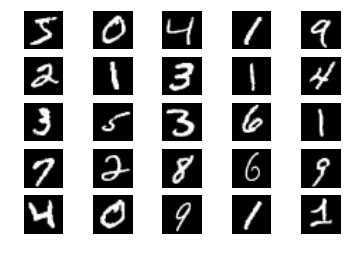

In [6]:
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')

## First, prepare data

In [7]:
n_features = X_train[0].shape[0] * X_train[0].shape[1]
X_train = X_train.reshape(-1, n_features).astype('float32')
X_test = X_test.reshape(-1, n_features).astype('float32')
# proper scaling of input
X_train /= 255
X_test /= 255

In [8]:
# one-hot encoding of target
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print Y_train.shape
print Y_test.shape

(60000, 10)
(10000, 10)


## Train a neural network

In [9]:
model = Sequential()
model.add(Dense(output_dim=100, input_shape=(n_features,)))
model.add(Activation('relu'))
model.add(Dropout(p=0.1))
model.add(Dense(output_dim=10))
model.add(Activation('softmax'))

# here keras creates all necessary variables 
# and compiles functions
model.compile(
    loss='categorical_crossentropy', # same as logloss, but multiclass
    optimizer=RMSprop(), # different optimization algorithms can be used
    metrics=['accuracy'] # which things to monitor
)

# training loop is hidden in this function
history = model.fit(X_train, Y_train,
                    # in practice, the 'step' uses not all the data, 
                    # but some reasonable chunk
                    batch_size=128, 
                    # 1 epoch = 'used whole sample for updates'
                    nb_epoch=5,
                    verbose=2, 
                    # to monitor test quality, we pass this to the model
                    validation_data=(X_test, Y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
1s - loss: 0.3721 - acc: 0.8951 - val_loss: 0.2013 - val_acc: 0.9424
Epoch 2/5
1s - loss: 0.1854 - acc: 0.9465 - val_loss: 0.1418 - val_acc: 0.9575
Epoch 3/5
1s - loss: 0.1391 - acc: 0.9596 - val_loss: 0.1145 - val_acc: 0.9670
Epoch 4/5
1s - loss: 0.1146 - acc: 0.9657 - val_loss: 0.1041 - val_acc: 0.9692
Epoch 5/5
1s - loss: 0.0983 - acc: 0.9700 - val_loss: 0.0966 - val_acc: 0.9708


## Checking predictions

In [10]:
from sklearn.metrics import log_loss, accuracy_score

print 'train loss: ', log_loss(Y_train, model.predict_proba(X_train, verbose=0))
print 'test  loss: ', log_loss(Y_test, model.predict_proba(X_test, verbose=0))

train loss:  0.0713785262014
test  loss:  0.0966423034323


In [11]:
# keras looks very familiar, but it isn't scikit-learn, so .predict works differently.
print 'train accuracy: ', accuracy_score(y_train, model.predict_proba(X_train, verbose=0).argmax(axis=1))
print 'test  accuracy: ', accuracy_score(y_test, model.predict_proba(X_test, verbose=0).argmax(axis=1))

train accuracy:  0.979483333333
test  accuracy:  0.9708


## Optional exercises

1. fine-tune the network above and look at misclassified images. For tuning, you can use the [this approach](http://i.imgur.com/bSiNEq6.gif)

2. compare two optimizers: `keras.optimizers.SGD` (simple stochastic SGD) and `keras.optimizers.Adadelta` (AdaDelta) on this dataset and study their performance depending on the number of hidden layers.



# References
- getting started with [sequential models in keras](https://keras.io/getting-started/sequential-model-guide/)
- neural networks [playground](http://playground.tensorflow.org)